# Face Detection

In [1]:
#importing tensorflow
import tensorflow as tf
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

import os
#os.listdir()

In [2]:
# hethi il dimensions mta3 il image, 224px*224px
IMAGE_SIZE = [224, 224]
# training image size will be 224,224

In [3]:
#train_path : il tsawer mta3 il training mnin bch yethazou
#valid_path : il tsawer mta3 il test(validation) mnin bch yethazou
train_path = 'C:/Users/azizk/OneDrive/Desktop/DatasetsV2/Train'
valid_path = 'C:/Users/azizk/OneDrive/Desktop/DatasetsV2/Test'

### here i used VGG16 for training 

In [4]:
#3malna model ma3moul 3al architecture VGG16 
#weights = 'imagenet'-> il model initialisé ib weights deja metranin min ImageNet dataset(dataset kbira mta3 tsawer)
vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)

In [5]:
#bch dour 3al layers ili t3amlou fil model mta3ek w bch t9olou maybadalhomech
for layer in vgg.layers:
    layer.trainable = False

In [6]:
folders = glob('C:/Users/azizk/OneDrive/Desktop/DatasetsV2/Train/*')

In [7]:
x =  Flatten()(vgg.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

In [9]:
model = Model(inputs = vgg.input, outputs = prediction)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

### loss will be 'categorical_crossentropy'

In [11]:
model.compile(
        loss = 'categorical_crossentropy',
        optimizer = 'adam',
        metrics = ['accuracy']
        )

In [12]:
#t7ather fil tsawer ili bch te5dim bihom
train_datagen = ImageDataGenerator(rescale= 1./255, shear_range= 0.2, zoom_range= 0.2, horizontal_flip= True)
test_datagen = ImageDataGenerator(rescale= 1./255)

#athouma bch t9oulou tsawer ili trani bihom
training_set = train_datagen.flow_from_directory('C:/Users/azizk/OneDrive/Desktop/DatasetsV2/Train', target_size= (224,224),
                                                        class_mode='categorical')
#w athouma ili testi bihom
test_set = test_datagen.flow_from_directory('C:/Users/azizk/OneDrive/Desktop/DatasetsV2/Test', target_size= (224,224),
                                                        class_mode= 'categorical')

Found 371 images belonging to 2 classes.
Found 131 images belonging to 2 classes.


In [13]:
#from PIL import Image
#import numpy as np
# load an image from file
#image = Image.open('C:/Users/azizk/OneDrive/Desktop/DatasetsV2/Train/George/WIN_20230731_21_16_54_Pro.jpg')
#image = image.resize((224, 224))
# convert the image pixels to a numpy array
#image_array = np.array(image)
#plt.imshow(image_array)
# this is label 3(Nani)

In [14]:
#from PIL import Image
#import numpy as np
# load an image from file
#image = Image.open('C:/Users/azizk/OneDrive/Desktop/DatasetsV2/Test/Bbkr/WIN_20230717_21_51_42_Pro.jpg')
#image = image.resize((224, 224))
# convert the image pixels to a numpy array
#image_array = np.array(image)
#plt.imshow(image_array)
# this is label 3(Nani)

In [15]:
print(len(training_set))

12


### here i am using three labels face  recornizer.

In [16]:
#lena 9a3ed dour 3al model 7 marat 5ater 3andek 7 sets mta3 training
from PIL import Image
r = model.fit_generator(training_set, validation_data= test_set, epochs=5, steps_per_epoch= len(training_set),
                        validation_steps=len(test_set))

C:\Users\azizk\anaconda3\envs\face\lib\site-packages\ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/5
12/12 [==============================] - 42s 3s/step - loss: 0.3037 - accuracy: 0.8679 - val_loss: 0.0535 - val_accuracy: 0.9618
Epoch 2/5
12/12 [==============================] - 48s 4s/step - loss: 0.0117 - accuracy: 1.0000 - val_loss: 7.0176e-04 - val_accuracy: 1.0000
Epoch 3/5
12/12 [==============================] - 46s 4s/step - loss: 9.1067e-04 - accuracy: 1.0000 - val_loss: 4.9533e-05 - val_accuracy: 1.0000
Epoch 4/5
12/12 [==============================] - 46s 4s/step - loss: 3.5334e-04 - accuracy: 1.0000 - val_loss: 2.1852e-05 - val_accuracy: 1.0000
Epoch 5/5
12/12 [==============================] - 46s 4s/step - loss: 5.3521e-04 - accuracy: 1.0000 - val_loss: 2.2112e-05 - val_accuracy: 1.0000


### train - validation loss

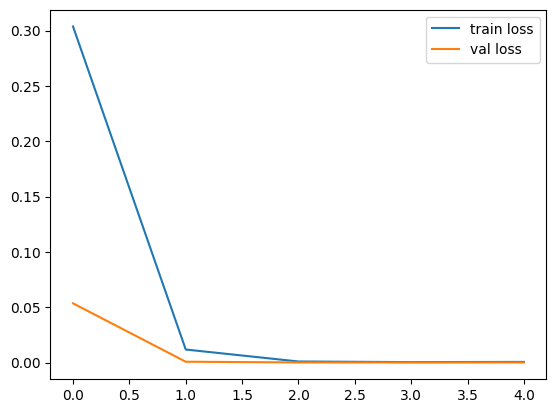

In [17]:
#ya3tik graph feha il changement mta3 il loss (kol ma il loss a9al kol ma a7sen)
plt.plot(r.history['loss'], label = 'train loss')
plt.plot(r.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()

## lets test with new image

In [18]:
# load an image from file
image = load_img('C:/Users/azizk/OneDrive/Images/Camera Roll/WIN_20230717_22_38_05_Pro.jpg', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# predict the probability across all output classes
yhat = model.predict(image)
yhat

1/1 [==============================] - 0s 387ms/step


array([[1.0000000e+00, 1.2278647e-11]], dtype=float32)

In [19]:
# load an image from file
image = load_img('C:/Users/azizk/OneDrive/Images/Camera Roll/WIN_20230717_22_41_34_Pro.jpg', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# predict the probability across all output classes
yhat = model.predict(image)
yhat

1/1 [==============================] - 0s 141ms/step


array([[2.474682e-09, 1.000000e+00]], dtype=float32)

In [20]:
# load an image from file
image = load_img('C:/Users/azizk/OneDrive/Images/Camera Roll/WIN_20230717_22_40_14_Pro.jpg', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# predict the probability across all output classes
yhat = model.predict(image)
yhat

1/1 [==============================] - 0s 157ms/step


array([[1.000000e+00, 5.005651e-18]], dtype=float32)

In [21]:
# load an image from file
image = load_img('C:/Users/azizk/OneDrive/Images/Camera Roll/WIN_20230717_22_41_34_Pro.jpg', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# predict the probability across all output classes
yhat = model.predict(image)
yhat

1/1 [==============================] - 0s 138ms/step


array([[2.474682e-09, 1.000000e+00]], dtype=float32)

In [22]:
# load an image from file
image = load_img('C:/Users/azizk/OneDrive/Images/Camera Roll/WIN_20230717_23_22_15_Pro.jpg', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# predict the probability across all output classes
yhat = model.predict(image)
yhat

1/1 [==============================] - 0s 170ms/step


array([[9.9953675e-01, 4.6329532e-04]], dtype=float32)

1 means Ashish, work successfully 

In [23]:
#savit il model ili 3maltou ka "Model_Face.h5"
from tensorflow.keras.models import load_model
model.save('Model_Face.h5')

Successfully saved
